## Cosimulación

### Carga de librerías

In [1]:
# Librerías
%reset -f
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from NLO_subsystems import mass_yF_uS, mass_yS_uF
from NLO_properties import sys
from CosimManager import JacobiManagerSR
from IPython import display

### Parámetros

In [2]:
# Masa
m1 = 1.0
m2 = 1.0

# Rigidez
k1 = 10.0
k2 = 1000.0
kc = 100.0

# Amortiguamiento
c1 = 1e-3
c2 = 1e-3
cc = 1e-3

# Condiciones iniciales
s10 = 0
s20 = 0
s1d0 = 100
s2d0 = -100

In [3]:
# Crea un sys con todos los parámetros
properties = sys(m1, m2, k1, k2, kc, c1, c2, cc, s10, s1d0, s20, s2d0)

### Esquema de coupling

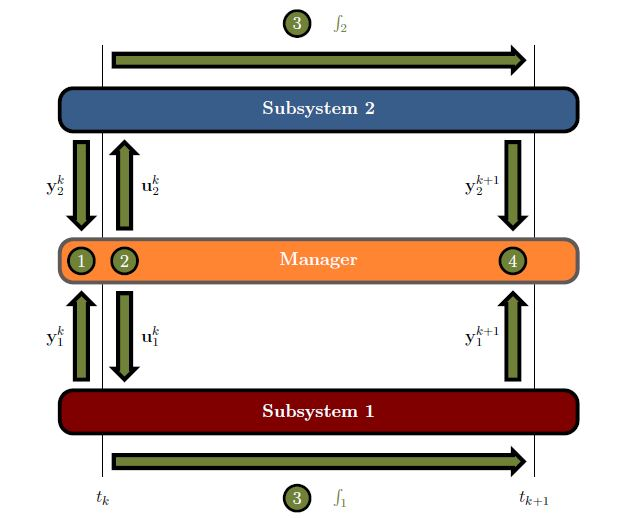

In [4]:
# Jacobi
display.Image("./Jacobi.jpg")

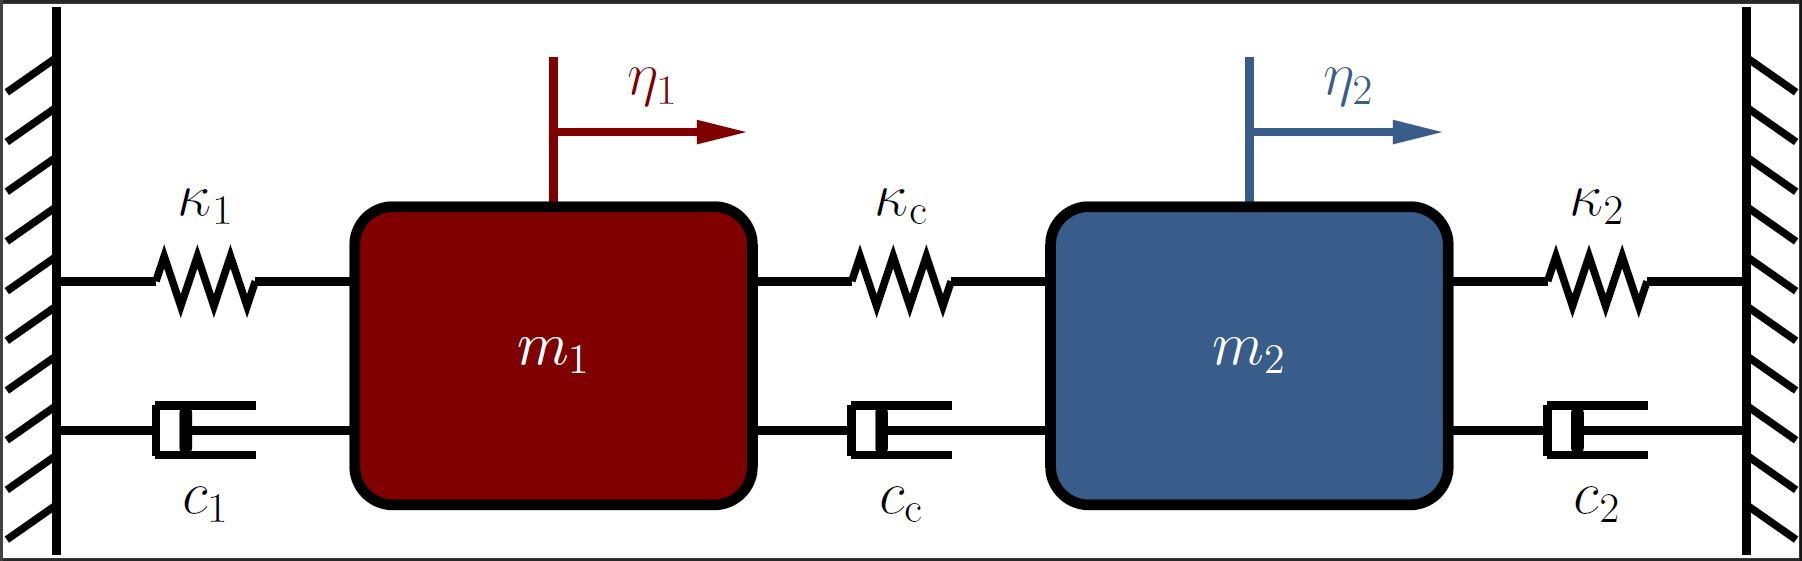

In [5]:
# Oscilador de 2 masas
display.Image("./LinearOscillator.jpg")

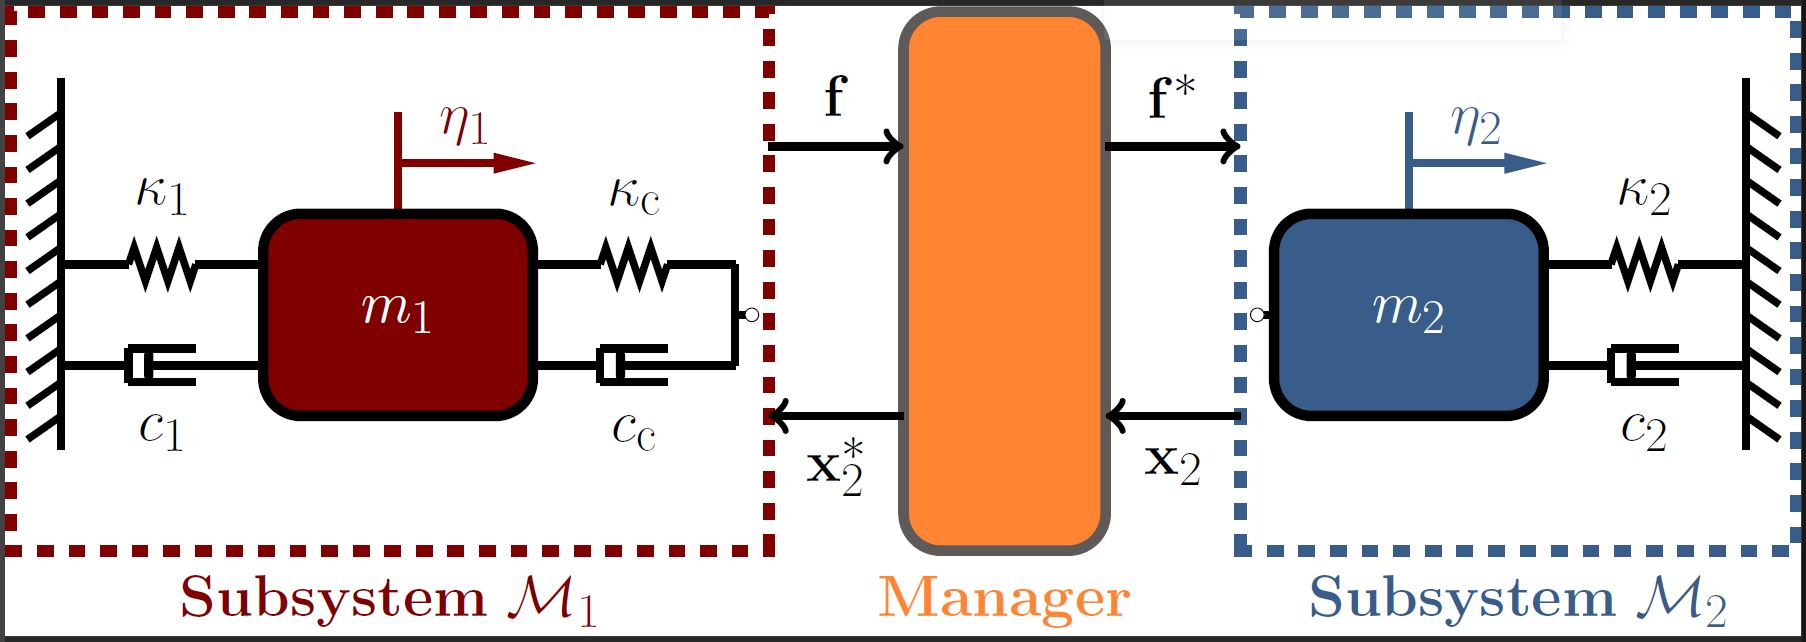

In [6]:
# Sistema cosimulado
display.Image("./LinearOscillatorCosim.jpg")

### Pasos de tiempo

In [4]:
# Pasos de tiempo
h1 = 1e-3
h2 = 1e-3
dt1 = 1e-3
dt2 = 1e-3
H = 1e-3

# Tiempo de simulación
tEnd = 10.0

### Solución de referencia

In [5]:
# Solución calculada con una co-simulación con paso de tiempo muy bajo. No hay solución analítica
# Instancias de ambos sistemas
ss1 = mass_yF_uS('SS1', properties, 1)
ss2 = mass_yS_uF('SS2', properties, 2)

# Manager single-rate
manager = JacobiManagerSR(properties, 1e-6, 1e-6, 1e-6, tEnd)

# Assigning subsystems
manager.assignSS1(ss1)
manager.assignSS2(ss2)

# Inicialización
y10, y20 = manager.initialize()
print('Initial solution: ')
print('Fc: ', -y10[0])
print('s2: ', y20[0])
print('s2d: ', y20[1])

# Loop
manager.run()

# Soluciones
ref_t, ref_fc, ref_s1, ref_s1d, ref_s1dd, ref_s2, ref_s2d, ref_s2dd, ref_T, ref_V, ref_E, ref_u = manager.getSTORE()

# Terminación
manager.terminate()

SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -40.0
s2:  0.0
s2d:  -100.0
Macro time:  0.001 s
Macro time:  0.002 s
Macro time:  0.003 s
Macro time:  0.004 s
Macro time:  0.005 s
Macro time:  0.006 s
Macro time:  0.007 s
Macro time:  0.008 s
Macro time:  0.009 s
Macro time:  0.01 s
Macro time:  0.011 s
Macro time:  0.012 s
Macro time:  0.013 s
Macro time:  0.014 s
Macro time:  0.015 s
Macro time:  0.016 s
Macro time:  0.017 s
Macro time:  0.018 s
Macro time:  0.019 s
Macro time:  0.02 s
Macro time:  0.021 s
Macro time:  0.022 s
Macro time:  0.023 s
Macro time:  0.024 s
Macro time:  0.025 s
Macro time:  0.026 s
Macro time:  0.027 s
Macro time:  0.028 s
Macro time:  0.029 s
Macro time:  0.03 s
Macro time:  0.031 s
Macro time:  0.032 s
Macro time:  0.033 s
Macro time:  0.034 s
Macro time:  0.035 s
Macro time:  0

### Solución cosimulada

In [6]:
# Instancias de ambos sistemas
ss1 = mass_yF_uS('SS1', properties, 1)
ss2 = mass_yS_uF('SS2', properties, 2)

# Manager single-rate
manager = JacobiManagerSR(properties, H, h1, h2, tEnd)

# Assigning subsystems
manager.assignSS1(ss1)
manager.assignSS2(ss2)

# Inicialización
y10, y20 = manager.initialize()
print('Initial solution: ')
print('Fc: ', -y10[0])
print('s2: ', y20[0])
print('s2d: ', y20[1])

# Loop
manager.run()

# Soluciones
cosim_t, cosim_fc, cosim_s1, cosim_s1d, cosim_s1dd, cosim_s2, cosim_s2d, cosim_s2dd, cosim_T, cosim_V, cosim_E, cosim_u = manager.getSTORE()

# Terminación
manager.terminate()

SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -40.0
s2:  0.0
s2d:  -100.0
Macro time:  1.0 s
Macro time:  2.0 s
Macro time:  3.0 s
Macro time:  4.0 s
Macro time:  5.0 s
Macro time:  6.0 s
Macro time:  7.0 s
Macro time:  8.0 s
Macro time:  9.0 s
Macro time:  10.0 s
Terminating mass block  1 time:  10.0 s
Terminating mass block  2 time:  10.0 s


In [7]:
# Solución cosimulada
dataframe = pd.DataFrame()
dataframe['Time'] = cosim_t
dataframe['s1*'] = cosim_s1
dataframe['s1d*'] = cosim_s1d
dataframe['s1dd*'] = cosim_s1dd
dataframe['s2*'] = cosim_s2
dataframe['s2d*'] = cosim_s2d
dataframe['s2dd*'] = cosim_s2dd
dataframe['f*'] = cosim_fc
dataframe['E*'] = cosim_E

# Solución analítica
dataframe['s1_ref'] = ref_s1[0::1000]
dataframe['s1d_ref'] = ref_s1d[0::1000]
dataframe['s1dd_ref'] = ref_s1dd[0::1000]
dataframe['s2_ref'] = ref_s2[0::1000]
dataframe['s2d_ref'] = ref_s2d[0::1000]
dataframe['s2dd_ref'] = ref_s2dd[0::1000]
dataframe['f_ref'] = ref_fc[0::1000]
dataframe['E_ref'] = ref_E[0::1000]

print(f'Rows: { dataframe.shape[0]} , Columns: {dataframe.shape[1]}')
dataframe.head()

Rows: 10001 , Columns: 17


,Time,s1*,s1d*,s1dd*,s2*,s2d*,s2dd*,f*,E*,s1_ref,s1d_ref,s1dd_ref,s2_ref,s2d_ref,s2dd_ref,f_ref,E_ref
0,0.000,0.000000,100.000000,-50.000000,0.000000,-100.000000,50.000000,-40.000000,10000.000000,0.000000,100.000000,-50.000000,0.000000,-100.000000,50.000000,-40.000000,10000.000000
1,0.001,0.099950,99.950000,-50.000000,-0.099950,-99.950000,50.000000,-49.975003,9997.045452,0.099971,99.939548,-70.891302,-0.099955,-99.890124,169.727914,-59.914625,9990.019034
2,0.002,0.199829,99.879060,-70.939513,-0.199740,-99.790085,159.915005,-69.909559,9995.074378,0.199872,99.858225,-91.718557,-0.199740,-99.660516,289.312082,-79.759101,9980.074036
3,0.003,0.299616,99.787262,-91.798800,-0.299251,-99.510477,279.607706,-89.766758,9993.072719,0.299681,99.756123,-112.447029,-0.299236,-99.311516,408.489628,-99.509842,9970.185803
4,0.004,0.399291,99.674702,-112.559938,-0.398362,-99.111558,398.919655,-109.528894,9991.029396,0.399377,99.633348,-133.063165,-0.398323,-98.843597,527.128348,-119.153468,9960.374799


In [8]:
# Guardar dataset
#dataframe.to_csv(path_or_buf = 'cosim_noDis.csv', index = False)

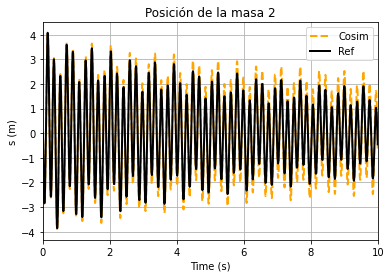

In [8]:
# Posiciones
plt.plot(dataframe['Time'], dataframe['s2*'], linestyle ='--', linewidth = 2, color = 'orange')
plt.plot(dataframe['Time'], dataframe['s2_ref'], linestyle ='-', linewidth = 2, color = 'black')
plt.title('Posición de la masa 2')
plt.ylabel('s (m)')
plt.xlabel('Time (s)')
plt.xlim([0, 10])
plt.legend(['Cosim', 'Ref'], loc = 'upper right')
plt.grid(True)
plt.show()

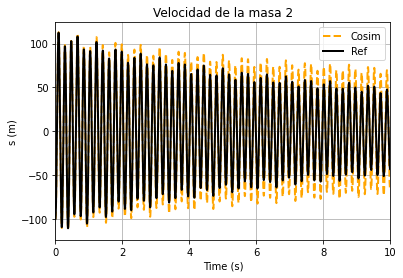

In [9]:
# Velocidades
plt.plot(dataframe['Time'], dataframe['s2d*'], linestyle ='--', linewidth = 2, color = 'orange')
plt.plot(dataframe['Time'], dataframe['s2d_ref'], linestyle ='-', linewidth = 2, color = 'black')
plt.title('Velocidad de la masa 2')
plt.ylabel('s (m)')
plt.xlabel('Time (s)')
plt.xlim([0, 10])
plt.legend(['Cosim', 'Ref'], loc = 'upper right')
plt.grid(True)
plt.show()

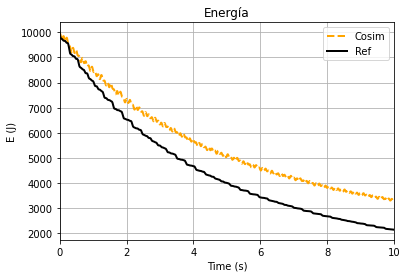

In [10]:
# Energía
plt.plot(dataframe['Time'], dataframe['E*'], linestyle ='--', linewidth = 2, color = 'orange')
plt.plot(dataframe['Time'], dataframe['E_ref'], linestyle ='-', linewidth = 2, color = 'black')
plt.title('Energía')
plt.ylabel('E (J)')
plt.xlabel('Time (s)')
plt.xlim([0, 10])
plt.legend(['Cosim', 'Ref'], loc = 'upper right')
plt.grid(True)
plt.show()

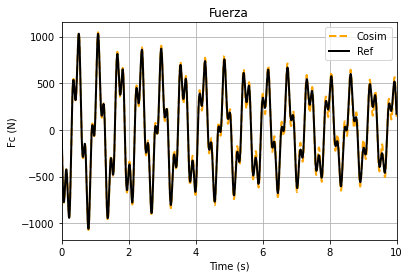

In [11]:
# Input fuerza
plt.plot(dataframe['Time'], dataframe['f*'], linestyle ='--', linewidth = 2, color = 'orange')
plt.plot(dataframe['Time'], dataframe['f_ref'], linestyle ='-', linewidth = 2, color = 'black')
plt.title('Fuerza')
plt.ylabel('Fc (N)')
plt.xlabel('Time (s)')
plt.xlim([0, 10])
plt.legend(['Cosim', 'Ref'], loc = 'upper right')
plt.grid(True)
plt.show()

### Cálculo coeficientes estimador

In [12]:
# Primero se calcula X donde se almacenan la fuerza actual y del paso anterior [1 f_actual f_anterior]
X = np.ones((10000, 3))
X[:, 1] = dataframe['f*'][1:]
X[:, 2] = dataframe['f*'][0:10000]
X


array([[  1.        , -49.9750025 , -40.        ],
       [  1.        , -69.90955946, -49.9750025 ],
       [  1.        , -89.76675803, -69.90955946],
       ...,
       [  1.        , 162.46158292, 173.2649425 ],
       [  1.        , 151.68532512, 162.46158292],
       [  1.        , 140.94476689, 151.68532512]])

In [13]:
# Se guardan las fuerzas de la solución de referencia para el paso actual [f_actual ref]
y = np.zeros((10000,))
y = dataframe['f_ref'][1:]
y

1        -59.914625
2        -79.759101
3        -99.509842
4       -119.153468
5       -138.676836
            ...    
9996     208.145117
9997     199.535956
9998     190.927631
9999     182.326222
10000    173.737753
Name: f_ref, Length: 10000, dtype: float64

In [14]:
# Los coeficientes se calculan como theta = (X' * X)^-1 (X' * Y)
theta = np.matmul(X.transpose(), X)
theta = np.matmul(np.matmul(np.linalg.pinv(theta), X.transpose()), y)
theta

array([-0.0921752 ,  1.04756154, -0.06530871])

In [15]:
# Se lanzan varias iteraciones de la cosimulación, donde se van actuaizando los coeficientes 
# para cada iteración según las fuerzas de acoplamiento que salen.
# Es necesario limitar la corrección del estimador para que no se inestabilice la dinámica

def loop(theta, lim, ite):
    
    for _ in range(0, ite):

        # Instancias de ambos sistemas
        ss1 = mass_yF_uS('SS1', properties, 1)
        ss2 = mass_yS_uF('SS2', properties, 2)

        # Manager single-rate
        manager = JacobiManagerSR(properties, H, h1, h2, tEnd)

        # Assigning subsystems
        manager.assignSS1(ss1)
        manager.assignSS2(ss2)

        # Correction
        manager.correctionCoeffs(theta, lim) # Se introduce el nuevo estimador y el límite de corrección

        # Inicialización
        y10, y20 = manager.initialize()
        print('Initial solution: ')
        print('Fc: ', -y10[0])
        print('s2: ', y20[0])
        print('s2d: ', y20[1])

        # Loop
        manager.run()

        # Soluciones
        cosim_t, cosim_fc, cosim_s1, cosim_s1d, cosim_s1dd, cosim_s2, cosim_s2d, cosim_s2dd, cosim_T, cosim_V, cosim_E, cosim_u = manager.getSTORE()

        # Terminación
        manager.terminate()

        # Solución cosimulada
        dataframe = pd.DataFrame()
        dataframe['Time'] = cosim_t
        dataframe['s1*'] = cosim_s1
        dataframe['s1d*'] = cosim_s1d
        dataframe['s1dd*'] = cosim_s1dd
        dataframe['s2*'] = cosim_s2
        dataframe['s2d*'] = cosim_s2d
        dataframe['s2dd*'] = cosim_s2dd
        dataframe['f*'] = cosim_fc
        dataframe['E*'] = cosim_E

        # Solución analítica
        dataframe['s1_ref'] = ref_s1[0::1000]
        dataframe['s1d_ref'] = ref_s1d[0::1000]
        dataframe['s1dd_ref'] = ref_s1dd[0::1000]
        dataframe['s2_ref'] = ref_s2[0::1000]
        dataframe['s2d_ref'] = ref_s2d[0::1000]
        dataframe['s2dd_ref'] = ref_s2dd[0::1000]
        dataframe['f_ref'] = ref_fc[0::1000]
        dataframe['E_ref'] = ref_E[0::1000]

        # Posiciones
        plt.plot(dataframe['Time'], dataframe['s2*'], linestyle ='--', linewidth = 2, color = 'orange')
        plt.plot(dataframe['Time'], dataframe['s2_ref'], linestyle ='-', linewidth = 2, color = 'black')
        plt.title('Posición de la masa 2')
        plt.ylabel('s (m)')
        plt.xlabel('Time (s)')
        plt.xlim([0, 10])
        plt.legend(['Cosim', 'Ref'], loc = 'upper right')
        plt.grid(True)
        plt.show()

        # Velocidades
        plt.plot(dataframe['Time'], dataframe['s2d*'], linestyle ='--', linewidth = 2, color = 'orange')
        plt.plot(dataframe['Time'], dataframe['s2d_ref'], linestyle ='-', linewidth = 2, color = 'black')
        plt.title('Velocidad de la masa 2')
        plt.ylabel('sd (m/s)')
        plt.xlabel('Time (s)')
        plt.xlim([0, 10])
        plt.legend(['Cosim', 'Ref'], loc = 'upper right')
        plt.grid(True)
        plt.show()

        # Fuerza
        plt.plot(dataframe['Time'], dataframe['f*'], linestyle ='--', linewidth = 2, color = 'orange')
        plt.plot(dataframe['Time'], dataframe['f_ref'], linestyle ='-', linewidth = 2, color = 'black')
        plt.title('Fuerza')
        plt.ylabel('Fc (N)')
        plt.xlabel('Time (s)')
        plt.xlim([0, 10])
        plt.legend(['Cosim', 'Corr', 'Ref'], loc = 'upper right')
        plt.grid(True)
        plt.show()

        # Energía
        plt.plot(dataframe['Time'], dataframe['E*'], linestyle ='--', linewidth = 2, color = 'orange')
        plt.plot(dataframe['Time'], dataframe['E_ref'], linestyle ='-', linewidth = 2, color = 'black')
        plt.title('Energía')
        plt.ylabel('E (J)')
        plt.xlabel('Time (s)')
        plt.xlim([0, 10])
        plt.legend(['Cosim', 'Ref'], loc = 'upper right')
        plt.grid(True)
        plt.show()

        # Errores
        #print('Error en energía: ', np.sqrt((dataframe['E*'] * dataframe['E_ref']).sum()) / np.sqrt(10001))
        #print('Error en posición: ', np.sqrt((dataframe['s2*'] * dataframe['s2_ref']).sum()) / np.sqrt(10001))
        #print('Error en velocidad: ', np.sqrt((dataframe['s2d*'] * dataframe['s2d_ref']).sum()) / np.sqrt(10001))
        print('Estimador usado: ', theta)

        # Evaluar theta
        X = np.ones((10000, 3))
        X[:, 1] = dataframe['f*'][1:]
        X[:, 2] = dataframe['f*'][0:10000]

        y = np.zeros((10000,))
        y = dataframe['f_ref'][1:]

        theta = np.matmul(X.transpose(), X)
        theta = np.matmul(np.matmul(np.linalg.pinv(theta), X.transpose()), y)

    return dataframe
    
    

SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -40.0
s2:  0.0
s2d:  -100.0
Macro time:  1.0 s
Macro time:  2.0 s
Macro time:  3.0 s
Macro time:  4.0 s
Macro time:  5.0 s
Macro time:  6.0 s
Macro time:  7.0 s
Macro time:  8.0 s
Macro time:  9.0 s
Macro time:  10.0 s
Terminating mass block  1 time:  10.0 s
Terminating mass block  2 time:  10.0 s


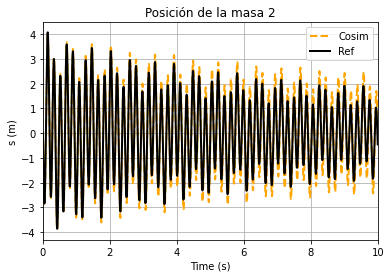

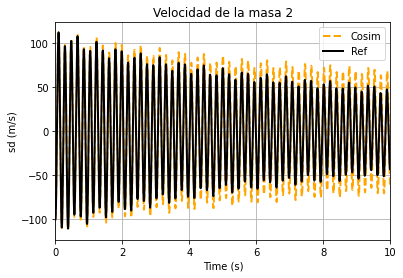

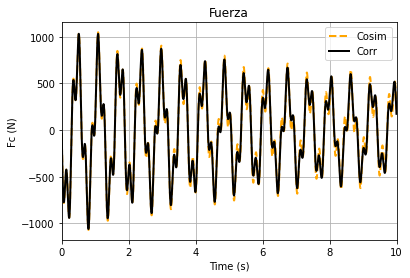

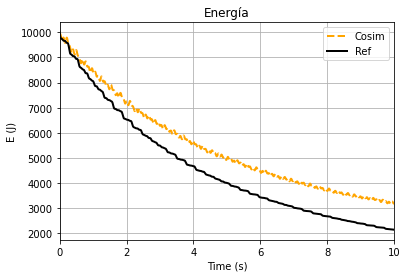

Estimador usado:  [-0.0921752   1.04756154 -0.06530871]
SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -40.0
s2:  0.0
s2d:  -100.0
Macro time:  1.0 s
Macro time:  2.0 s
Macro time:  3.0 s
Macro time:  4.0 s
Macro time:  5.0 s
Macro time:  6.0 s
Macro time:  7.0 s
Macro time:  8.0 s
Macro time:  9.0 s
Macro time:  10.0 s
Terminating mass block  1 time:  10.0 s
Terminating mass block  2 time:  10.0 s


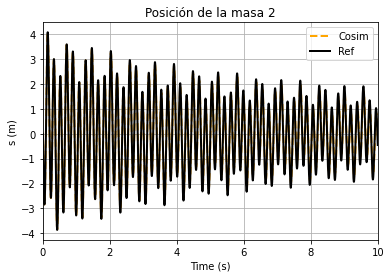

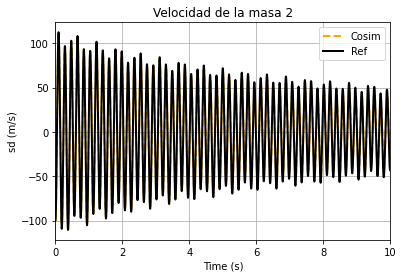

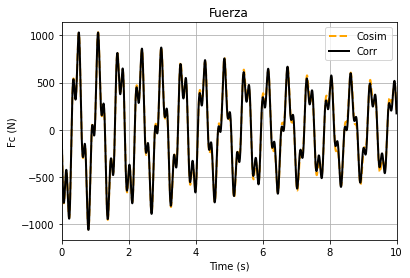

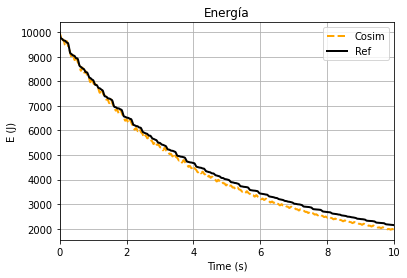

Estimador usado:  [-0.28871294  2.36092554 -1.380295  ]
SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -40.0
s2:  0.0
s2d:  -100.0
Macro time:  1.0 s
Macro time:  2.0 s
Macro time:  3.0 s
Macro time:  4.0 s
Macro time:  5.0 s
Macro time:  6.0 s
Macro time:  7.0 s
Macro time:  8.0 s
Macro time:  9.0 s
Macro time:  10.0 s
Terminating mass block  1 time:  10.0 s
Terminating mass block  2 time:  10.0 s


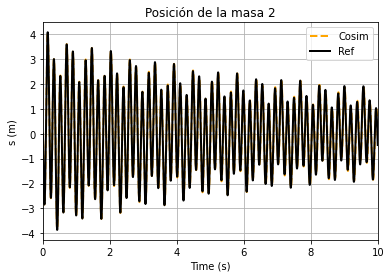

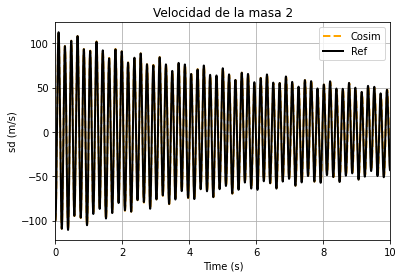

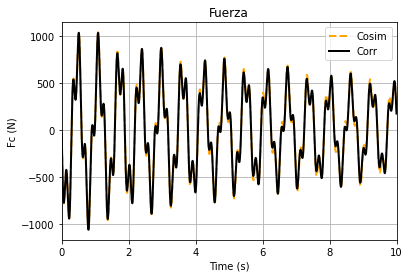

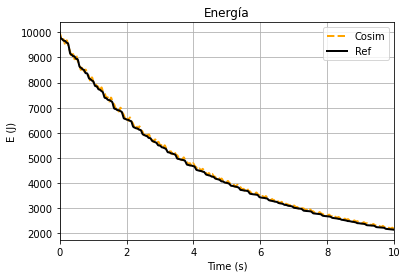

Estimador usado:  [-0.48745054  1.93924181 -0.95723529]
SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -40.0
s2:  0.0
s2d:  -100.0
Macro time:  1.0 s
Macro time:  2.0 s
Macro time:  3.0 s
Macro time:  4.0 s
Macro time:  5.0 s
Macro time:  6.0 s
Macro time:  7.0 s
Macro time:  8.0 s
Macro time:  9.0 s
Macro time:  10.0 s
Terminating mass block  1 time:  10.0 s
Terminating mass block  2 time:  10.0 s


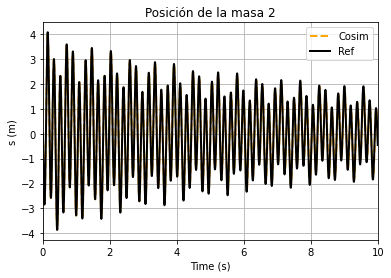

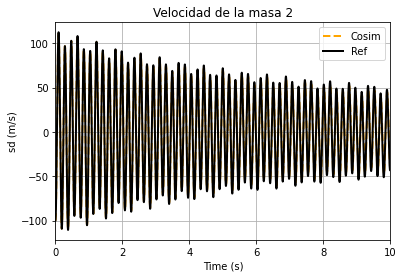

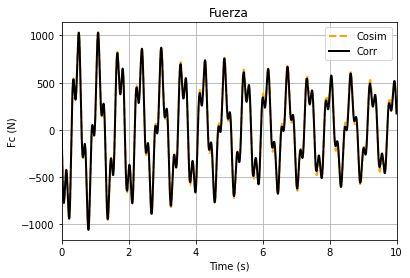

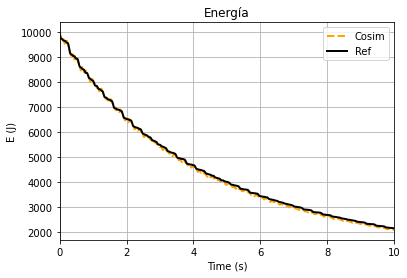

Estimador usado:  [-0.41606449  2.08567555 -1.10121023]
SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -40.0
s2:  0.0
s2d:  -100.0
Macro time:  1.0 s
Macro time:  2.0 s
Macro time:  3.0 s
Macro time:  4.0 s
Macro time:  5.0 s
Macro time:  6.0 s
Macro time:  7.0 s
Macro time:  8.0 s
Macro time:  9.0 s
Macro time:  10.0 s
Terminating mass block  1 time:  10.0 s
Terminating mass block  2 time:  10.0 s


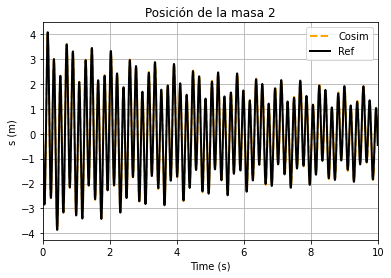

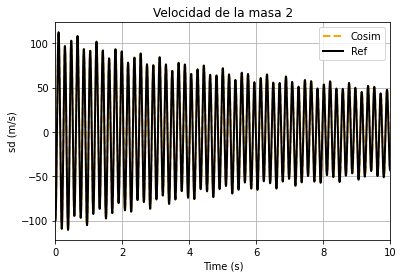

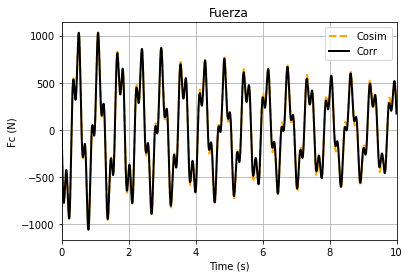

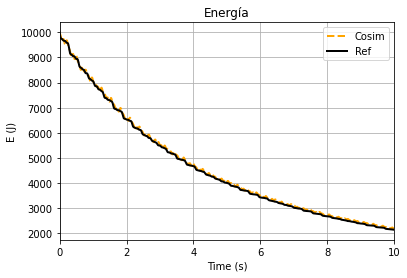

Estimador usado:  [-0.42251077  1.92406006 -0.94010364]
SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -40.0
s2:  0.0
s2d:  -100.0
Macro time:  1.0 s
Macro time:  2.0 s
Macro time:  3.0 s
Macro time:  4.0 s
Macro time:  5.0 s
Macro time:  6.0 s
Macro time:  7.0 s
Macro time:  8.0 s
Macro time:  9.0 s
Macro time:  10.0 s
Terminating mass block  1 time:  10.0 s
Terminating mass block  2 time:  10.0 s


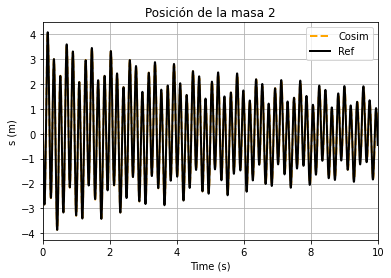

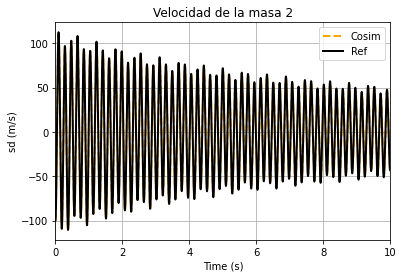

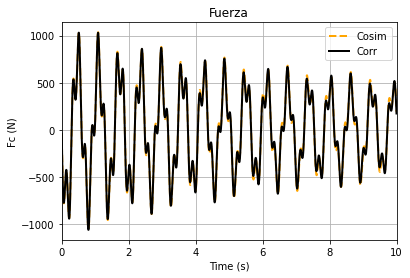

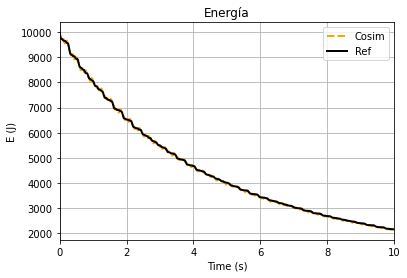

Estimador usado:  [-0.3984655   2.01057725 -1.02581032]
SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -40.0
s2:  0.0
s2d:  -100.0
Macro time:  1.0 s
Macro time:  2.0 s
Macro time:  3.0 s
Macro time:  4.0 s
Macro time:  5.0 s
Macro time:  6.0 s
Macro time:  7.0 s
Macro time:  8.0 s
Macro time:  9.0 s
Macro time:  10.0 s
Terminating mass block  1 time:  10.0 s
Terminating mass block  2 time:  10.0 s


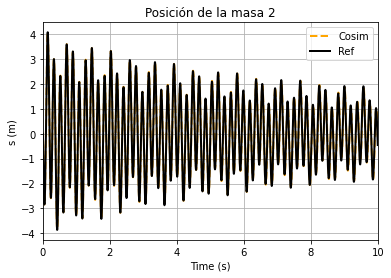

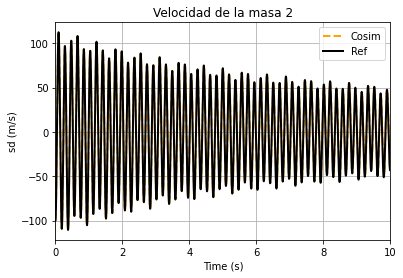

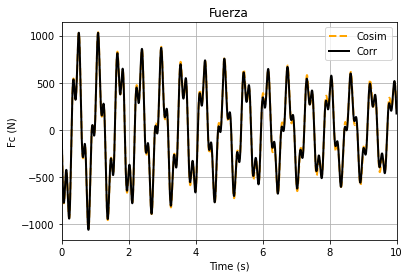

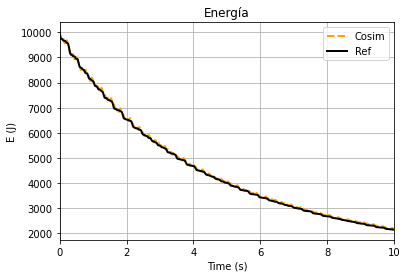

Estimador usado:  [-0.40699372  1.94090799 -0.95648413]
SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -40.0
s2:  0.0
s2d:  -100.0
Macro time:  1.0 s
Macro time:  2.0 s
Macro time:  3.0 s
Macro time:  4.0 s
Macro time:  5.0 s
Macro time:  6.0 s
Macro time:  7.0 s
Macro time:  8.0 s
Macro time:  9.0 s
Macro time:  10.0 s
Terminating mass block  1 time:  10.0 s
Terminating mass block  2 time:  10.0 s


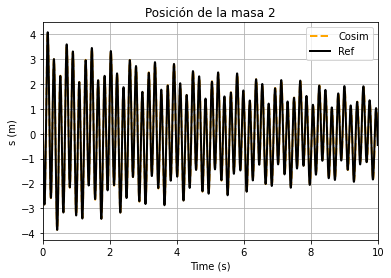

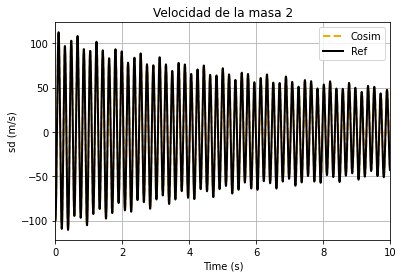

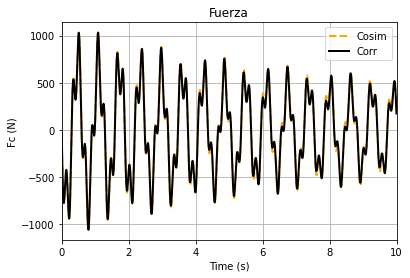

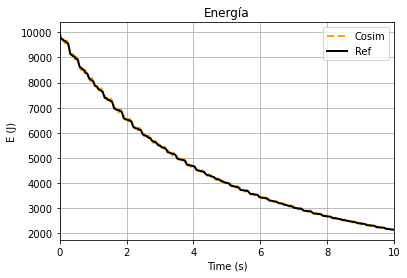

Estimador usado:  [-0.39754174  1.98302526 -0.99827817]
SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -40.0
s2:  0.0
s2d:  -100.0
Macro time:  1.0 s
Macro time:  2.0 s
Macro time:  3.0 s
Macro time:  4.0 s
Macro time:  5.0 s
Macro time:  6.0 s
Macro time:  7.0 s
Macro time:  8.0 s
Macro time:  9.0 s
Macro time:  10.0 s
Terminating mass block  1 time:  10.0 s
Terminating mass block  2 time:  10.0 s


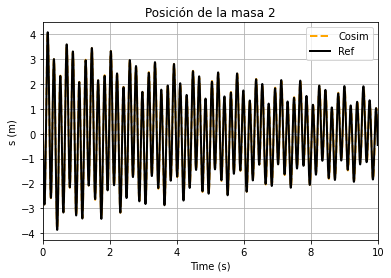

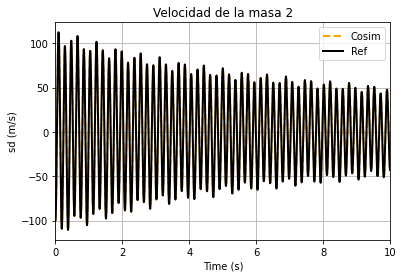

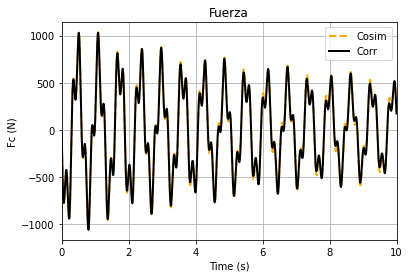

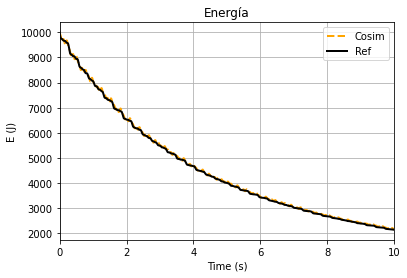

Estimador usado:  [-0.40228244  1.95234613 -0.96777389]
SS1 assigned correctly
SS2 assigned correctly
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initializing mass block 1
Initializing mass block 2
Initial solution: 
Fc:  -40.0
s2:  0.0
s2d:  -100.0
Macro time:  1.0 s
Macro time:  2.0 s
Macro time:  3.0 s
Macro time:  4.0 s
Macro time:  5.0 s
Macro time:  6.0 s
Macro time:  7.0 s
Macro time:  8.0 s
Macro time:  9.0 s
Macro time:  10.0 s
Terminating mass block  1 time:  10.0 s
Terminating mass block  2 time:  10.0 s


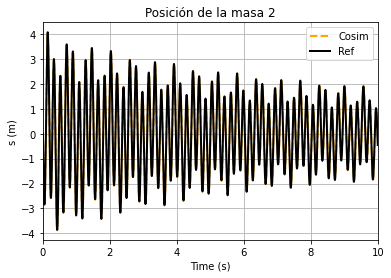

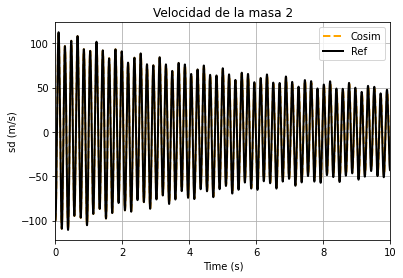

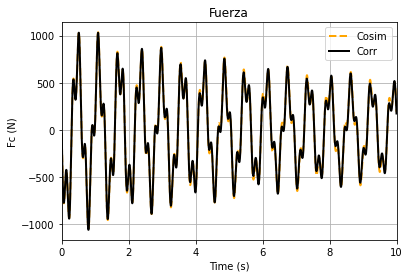

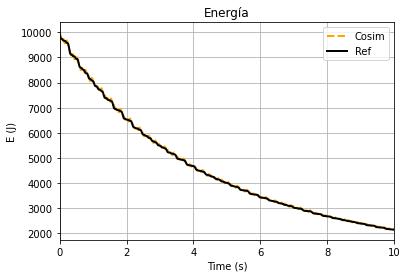

Estimador usado:  [-0.39831971  1.97194493 -0.98723563]


In [17]:
df = loop(theta, 20, 10)

In [24]:
# Guardar dataset
df.to_csv(path_or_buf = 'nlo_Dis.csv', index = False)

df2 = pd.read_csv('nlo_Dis.csv', skiprows=lambda x: (x-1)%10 != 0, header=None)
df2.to_csv(path_or_buf = 'nlo_Dis.csv', index = False)